Стрихар П.А. ИУ5-61б

Вариант 18, задание 3, датасет 2. 

**Задание** Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему? Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Анализируем данные только на обучающей выборке
data = pd.read_csv('dc-wikia-data.csv', sep = ',')

In [3]:
data.shape

(6896, 13)

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6896


In [5]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
YEAR                float64
dtype: object

In [7]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [8]:
# Выберем числовые колонки с пропущенными значениями
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355, 5.15%.
Колонка YEAR. Тип данных float64. Количество пустых значений 69, 1.0%.


Выполним масштабирование колонки "Appearances" - кол-во появлений персонажей. Будем использовать метод MinMax

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [10]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])

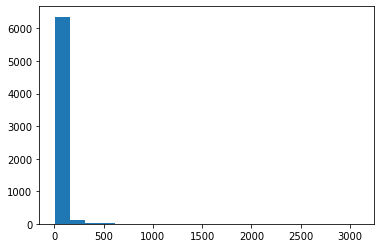

In [15]:
plt.hist(data['APPEARANCES'], 20)
plt.show()

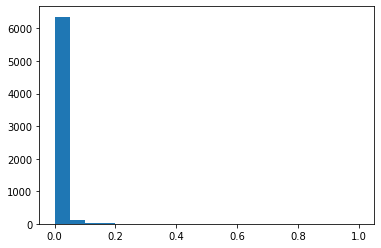

In [16]:
plt.hist(sc1_data, 20)
plt.show()

Выполним преобразование категориальных признаков в количественные

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Кол-во пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Кол-во пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Кол-во пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Кол-во пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Кол-во пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Кол-во пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Кол-во пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Кол-во пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Кол-во пустых значений 69, 1.0%.


Для преобразования возьмем колонку First APPEARANCE. Для этой колонки лучше всего использовать Label Encoding, так как это колонки отражают даты, то есть в них есть порядок. 

In [52]:
#Для начала заполним пропущенные данные 
cat_temp_data = data[['FIRST APPEARANCE']]
cat_temp_data.head()

,FIRST APPEARANCE
0,"1939, May"
1,"1986, October"
2,"1959, October"
3,"1987, February"
4,"1940, April"


In [20]:
cat_temp_data['FIRST APPEARANCE'].unique()

array(['1939, May', '1986, October', '1959, October', '1987, February',
       '1940, April', '1941, December', '1941, November', '1989, August',
       '1969, November', '1956, October', '1940, July', '1967, January',
       '1940, January', '1938, June', '1943, April', '1994, January',
       '1961, October', '1976, February', '1942, January',
       '1965, November', '1968, March', '1980, October', '1993, June',
       '1960, May', '1971, December', '1940, June', '1959, April',
       '1960, February', '1965, January', '1964, November',
       '1940, February', '1986, February', '1996, January', '1940, May',
       '1974, July', '1989, April', '1939, April', '1970, December',
       '1987, March', '1978, March', '1968, August', '1984, June',
       '1940, October', '1941, April', '1983, June', '1977, April',
       '1980, December', '1952, September', '1982, June', '1963, June',
       '1972, September', '1983, September', '1972, November',
       '1992, March', '1942, August', '199

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['1939, May'],
       ['1986, October'],
       ['1959, October'],
       ...,
       ['2010, December'],
       ['2010, December'],
       ['2010, December']], dtype=object)

In [23]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,"1939, May"
1,"1986, October"
2,"1959, October"
3,"1987, February"
4,"1940, April"
...,...
6891,"2010, December"
6892,"2010, December"
6893,"2010, December"
6894,"2010, December"


In [24]:
cat_enc['c1'].unique()

array(['1939, May', '1986, October', '1959, October', '1987, February',
       '1940, April', '1941, December', '1941, November', '1989, August',
       '1969, November', '1956, October', '1940, July', '1967, January',
       '1940, January', '1938, June', '1943, April', '1994, January',
       '1961, October', '1976, February', '1942, January',
       '1965, November', '1968, March', '1980, October', '1993, June',
       '1960, May', '1971, December', '1940, June', '1959, April',
       '1960, February', '1965, January', '1964, November',
       '1940, February', '1986, February', '1996, January', '1940, May',
       '1974, July', '1989, April', '1939, April', '1970, December',
       '1987, March', '1978, March', '1968, August', '1984, June',
       '1940, October', '1941, April', '1983, June', '1977, April',
       '1980, December', '1952, September', '1982, June', '1963, June',
       '1972, September', '1983, September', '1972, November',
       '1992, March', '1942, August', '199

In [25]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [26]:
le.classes_

array(['1935, October', '1936, February', '1936, March',
       '1936, September', '1937, March', '1938, January', '1938, July',
       '1938, June', '1938, October', '1939, April', '1939, August',
       '1939, December', '1939, July', '1939, June', '1939, May',
       '1939, November', '1939, October', '1939, September', '1940',
       '1940, April', '1940, December', '1940, February', '1940, January',
       '1940, July', '1940, June', '1940, March', '1940, May',
       '1940, November', '1940, October', '1940, September',
       '1941, April', '1941, August', '1941, December', '1941, February',
       '1941, January', '1941, July', '1941, June', '1941, May',
       '1941, November', '1941, October', '1941, September',
       '1942, April', '1942, August', '1942, December', '1942, February',
       '1942, January', '1942, June', '1942, March', '1942, May',
       '1942, November', '1942, September', '1943, April', '1943, August',
       '1943, December', '1943, February', '1943, Jan

In [27]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Для этой колонки не подойдет метод One-Hot encoding, т.к. в данных изначально есть порядок и присутствует много уникальных значений. Для метода One-Hot encoding подойдет колонка ALIGN.

In [33]:
#Для начала заполним пропущенные данные 
cat_temp_data2 = data[['ALIGN']]
cat_temp_data2.head()

,ALIGN
0,Good Characters
1,Good Characters
2,Good Characters
3,Good Characters
4,Good Characters


In [34]:
cat_temp_data2['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [35]:
# Импьютация наиболее частыми значениями
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data2)
data_imp4

array([['Good Characters'],
       ['Good Characters'],
       ['Good Characters'],
       ...,
       ['Good Characters'],
       ['Good Characters'],
       ['Bad Characters']], dtype=object)

In [36]:
cat_enc4 = pd.DataFrame({'c2':data_imp4.T[0]})
cat_enc4

,c2
0,Good Characters
1,Good Characters
2,Good Characters
3,Good Characters
4,Good Characters
...,...
6891,Good Characters
6892,Good Characters
6893,Good Characters
6894,Good Characters


In [37]:
pd.get_dummies(cat_enc4).head()

,c2_Bad Characters,c2_Good Characters,c2_Neutral Characters,c2_Reformed Criminals
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [38]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc4[['c2']])

In [39]:
cat_enc_ohe

<6896x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6896 stored elements in Compressed Sparse Row format>

In [40]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

**Построение диаграммы рассеяния**

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='YEAR', ylabel='HAIR'>

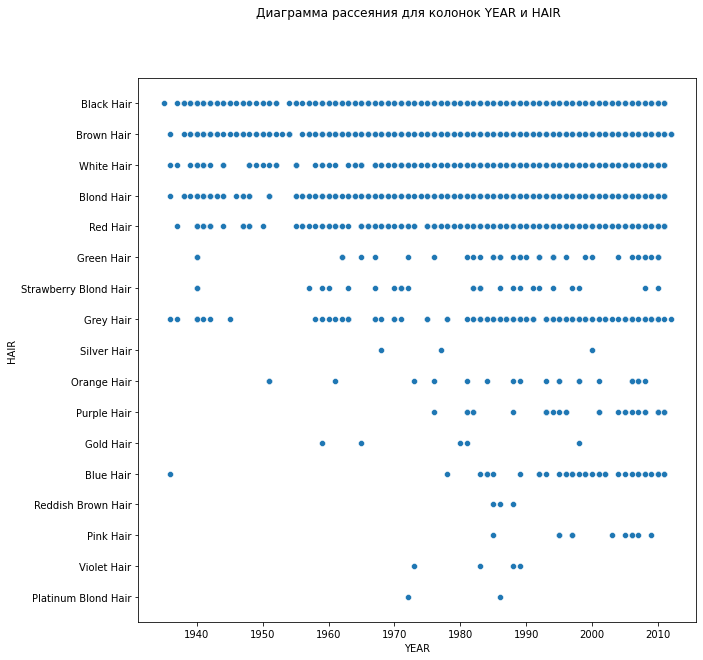

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle("Диаграмма рассеяния для колонок YEAR и HAIR")
sns.scatterplot(ax=ax, x='YEAR', y='HAIR', data=data)